In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
from utils import *

In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
print(get_top20_stocks(path=datadir))

[('00DS30', 3084026774000.0), ('00DSES', 2132060774800.0), ('00DSEX', 3370925421616.0), ('1JANATAMF', 233585572.0), ('1STPRIMFMF', 332978314.0), ('AAMRANET', 148017730.0), ('AAMRATECH', 683394625.0), ('ABB1STMF', 256367920.0), ('ABBANK', 769581974.0), ('ACFL', 104802917.0), ('ACI', 94419722.0), ('ACIFORMULA', 126512844.0), ('ACMELAB', 53292422.0), ('ACTIVEFINE', 848206734.0), ('ADNTEL', 51799485.0), ('ADVENT', 237026778.0), ('AFCAGRO', 336544932.0), ('AFTABAUTO', 297630571.0), ('AGNISYSL', 567261957.0), ('AGRANINS', 25712648.0)]


### Regime change/ Structural break.

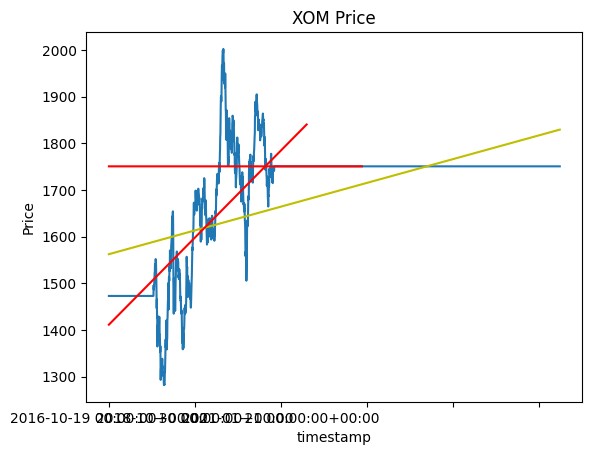

In [3]:
stockname = '00DS30'
df = get_prices(stockname, path=datadir) 
prices = df.close
# returns = get_returns(dataframe=df, field='close')

# Manually set the point where we think a structural break occurs
breakpoint = 1150
xs = np.arange(len(prices))
xs2 = np.arange(breakpoint)
xs3 = np.arange(len(prices) - breakpoint)

# Perform linear regressions on the full data set, the data up to the breakpoint, and the data after
a, b = linreg(xs, prices)
a2, b2 = linreg(xs2, prices[:breakpoint])
a3, b3 = linreg(xs3, prices[breakpoint:])

Y_hat = pd.Series(xs * b + a, index=prices.index)
Y_hat2 = pd.Series(xs2 * b2 + a2, index=prices.index[:breakpoint])
Y_hat3 = pd.Series(xs3 * b3 + a3, index=prices.index[breakpoint:])

# Plot the raw data
prices.plot()
Y_hat.plot(color='y')
Y_hat2.plot(color='r')
Y_hat3.plot(color='r')
plt.title('XOM Price')
plt.ylabel('Price');

In [4]:
stats.diagnostic.breaks_cusumolsresid(
    regression.linear_model.OLS(prices, sm.add_constant(xs)).fit().resid)[1]

3.2878646037401314e-136

### Multicollinearity

Constant: 2492.654413085017 MLR beta to ACMELAB: -9.333869351779684 MLR beta to ACI 1.3882028659439398


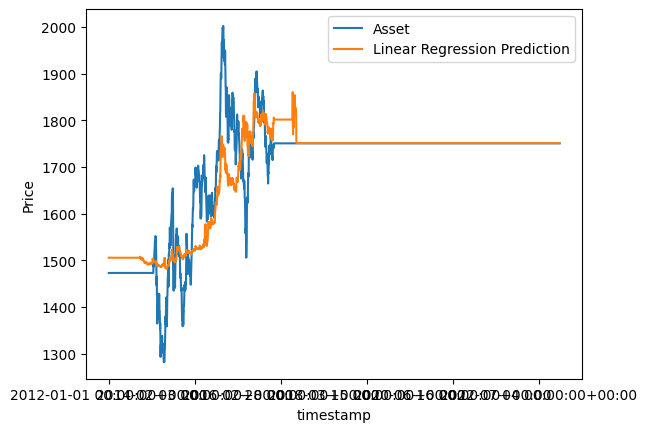

In [9]:
# Get pricing data for two pharma stocks(ACMELAB, ACI) and 00DS30

stockname1, stockname2, stockname3 = 'ACMELAB', 'ACI', '00DS30'
df1, df2, df3 = get_prices(stockname1, path=datadir), get_prices(stockname2, path=datadir),get_prices(stockname3, path=datadir)
b1, b2, asset = df1.close, df2.close, df3.close


mlr = regression.linear_model.OLS(asset, sm.add_constant(np.column_stack((b1, b2)))).fit()
prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2
print('Constant:', mlr.params[0], 'MLR beta to ACMELAB:', mlr.params[1], 'MLR beta to ACI', mlr.params[2])

# Plot the asset pricing data and the regression model prediction, just for fun
asset.plot()
prediction.plot();
plt.ylabel('Price')
plt.legend(['Asset', 'Linear Regression Prediction']);